## 1) Importando bibliotecas

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns; sns.set()

%matplotlib inline

Vamos utilizar um módulo do pandas chamado data reader para ler dados sobre o mercado financeiro

In [4]:
from pandas_datareader.data import DataReader

## 2) Séries temporais

Uma **série temporal** nada mais é que **um conjunto de valores sequenciais temporalmente indexados**.

Séries temporais aparecem em diversos contextos, e o principal objetivo de seu estudo é o de conseguir **caputrar estrutura adicional** na indexação sequencial/temporal, como, por exemplo, padrões que se reptem periodicamente.

A **análise de séries temporais** nos proporciona ferramentas para:

- Descrever o comportamento da série;

- Encontrar periodicidades;

- Obter possíveis explicações para o comportamento da série, geralmente através de variáveis auxiliares;

- Predizer o comportamento futuro, o que possibilita fazer planos a longo, médio ou curto prazo e tomar decisões apropriadas.

Primeiramente, vamos usar o DataReader para capturar a série temporal de algum ativo financeiro.

Neste curso, usaremos como fonte de dados o portal **Yahoo Finance** (https://finance.yahoo.com/).

Para consultar a série temporal **dos preços de algum ativo**, basta identificar qual é o seu **símbolo** no site acima. No caso de ações, temos os tickers.

In [7]:
df = DataReader('BTC-USD', data_source='yahoo', start='2009')
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2014-09-17,468.174011,452.421997,465.864014,457.334015,21056800.0,457.334015
2014-09-18,456.859985,413.104004,456.859985,424.440002,34483200.0,424.440002
2014-09-19,427.834991,384.532013,424.102997,394.795990,37919700.0,394.795990
2014-09-20,423.295990,389.882996,394.673004,408.903992,36863600.0,408.903992
2014-09-21,412.425995,393.181000,408.084991,398.821014,26580100.0,398.821014


In [9]:
df.loc['2016-03':]

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2016-03-01,439.653015,432.319000,437.916992,435.122986,7.489580e+07,435.122986
2016-03-02,435.916992,423.989014,435.131012,423.989014,7.495530e+07,423.989014
2016-03-03,425.372986,419.411011,423.911987,421.651001,1.004840e+08,421.651001
2016-03-04,425.178009,410.938995,421.835999,410.938995,9.085610e+07,410.938995
2016-03-05,411.256989,394.035004,410.781006,400.570007,1.353850e+08,400.570007
...,...,...,...,...,...,...
2021-12-06,50929.519531,47281.035156,49413.480469,50582.625000,3.770731e+10,50582.625000
2021-12-07,51934.781250,50175.808594,50581.828125,50700.085938,3.367681e+10,50700.085938
2021-12-08,51171.375000,48765.988281,50667.648438,50504.796875,2.847970e+10,50504.796875


Vamos visualizar o comportamento das ações ao longo do tempo

In [10]:
import plotly.express as px

Vamos observar alguma ação em particular de agora em diante

In [13]:
px.line(df, x = df.index, y = 'Adj Close')

In [14]:
sigla = 'MGLU3.SA'
df = DataReader(sigla, data_source='yahoo', start = '2009')

In [15]:
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2011-05-02,0.518750,0.503125,0.503125,0.514062,280003200.0,0.463173
2011-05-03,0.521562,0.506250,0.515625,0.509375,33670400.0,0.458950
2011-05-04,0.515000,0.510000,0.510000,0.515000,39203200.0,0.464018
2011-05-05,0.512812,0.510000,0.512812,0.511875,35097600.0,0.461202
2011-05-06,0.511875,0.500000,0.510937,0.508125,38672000.0,0.457824


Note que o DataReader produz automaticamente um dataframe com as datas **como os índices**

Isso ajuda muito na hora de fazermos os plots, e também nos filtros:

Sempre que formos trabalhar com preços de ativos, é importante que trabalhemos com o **preço ajustado**, que nada mais é que o preço acrescido do pagamento de dividendos.

### 2.1) Plotando séries temporais

A forma mais simples de plotar uma série temporal é através do método `plot()` do próprio pandas.

In [16]:
px.line(df, x = df.index, y = 'Adj Close')

A melhor forma de plotar time series é usando plotly

In [19]:
import plotly
import plotly.graph_objs as go
from plotly.offline import *

In [22]:
df['Adj Close']

Date
2011-05-02    0.463173
2011-05-03    0.458950
2011-05-04    0.464018
2011-05-05    0.461202
2011-05-06    0.457824
                ...   
2021-12-06    7.300000
2021-12-07    7.620000
2021-12-08    6.810000
2021-12-09    6.280000
2021-12-10    6.370000
Name: Adj Close, Length: 2635, dtype: float64

In [25]:
price = df['Adj Close']

data = [go.Scatter(x = price.index, y = price)]

axis_x = {'rangeslider':{'visible':True}}

layout = {
        'title': 'Preco ajustado Magalu',
        'xaxis' : axis_x
}

fig = {'data':data, 'layout':layout}

plotly.offline.iplot(fig)

### 2.2) Janelas deslizantes

É muito comum que séries temporais de preços de ativos financeiros apresentem grandes oscilações, como esta que estamos estudando.

Para eliminar estas variações e **suavizar** a série temporal, de modo que possa ser mais simples observar tendências e movimentos, é comum utilizarmos a técnica de **janela de média móvel (deslizante)**, que consiste em substituir os valores ao fim da janela pela **média** dos valores da janela imediatamente anterior.

É muito simples fazer isso com o pandas, utilizando o método `rolling`:

In [29]:
price.rolling(window='30D').mean()

Date
2011-05-02    0.463173
2011-05-03    0.461061
2011-05-04    0.462047
2011-05-05    0.461836
2011-05-06    0.461033
                ...   
2021-12-06    9.350000
2021-12-07    9.267619
2021-12-08    9.023810
2021-12-09    8.697619
2021-12-10    8.380952
Name: Adj Close, Length: 2635, dtype: float64

In [36]:
mm30 = price.rolling(window='30D').mean()
mm90 = price.rolling(window='90D').mean()
mm120 = price.rolling(window='120D').mean()

<function matplotlib.pyplot.legend(*args, **kwargs)>

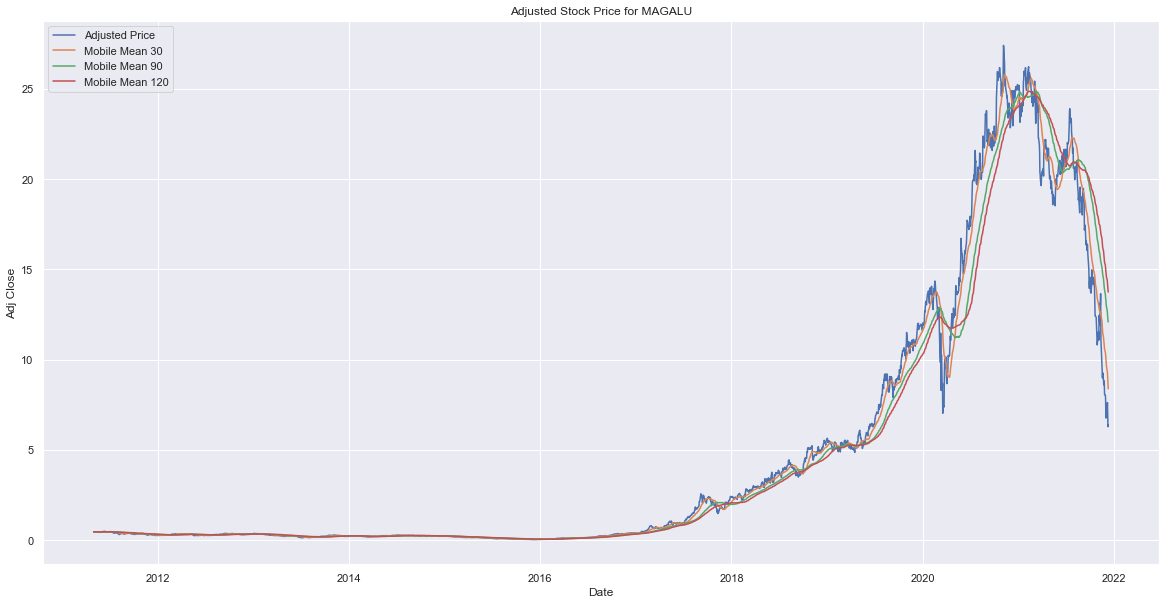

In [39]:
plt.figure(figsize=(20,10))
plt.title('Adjusted Stock Price for MAGALU')

sns.lineplot(data = price, label = 'Adjusted Price')
sns.lineplot(data = mm30, label = 'Mobile Mean 30')
sns.lineplot(data = mm90, label = 'Mobile Mean 90')
sns.lineplot(data = mm120, label = 'Mobile Mean 120')

plt.legend

Comparando diferentes janelas